Preview of the dataset:
              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    f

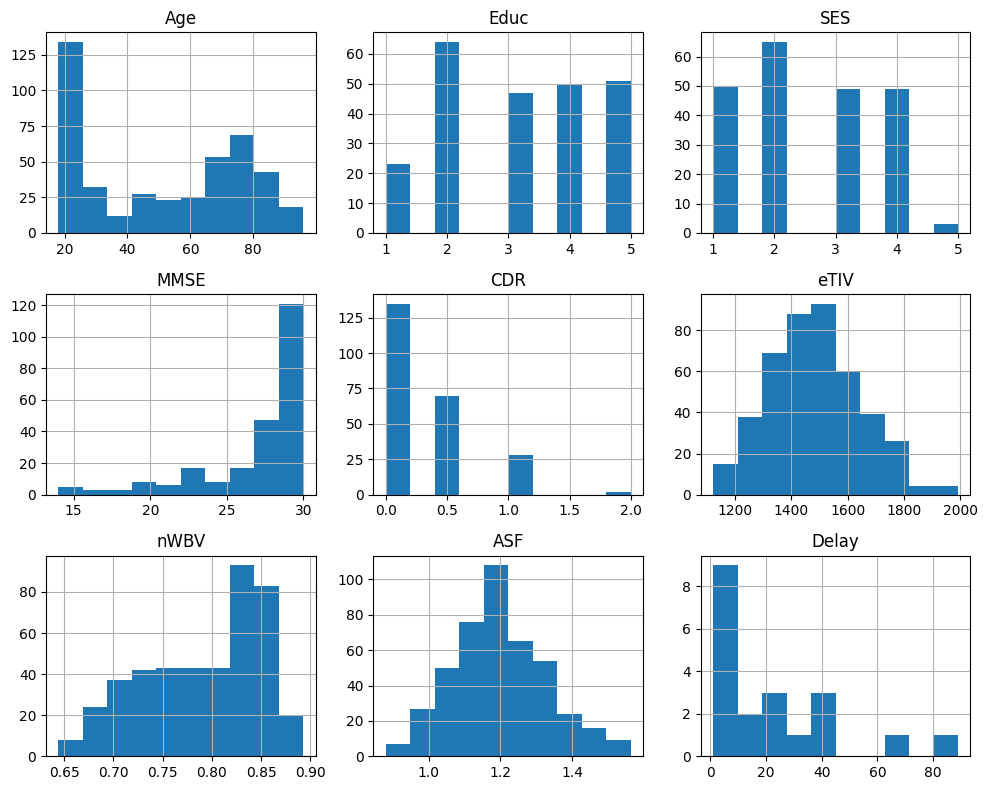


Correlation Heatmap:


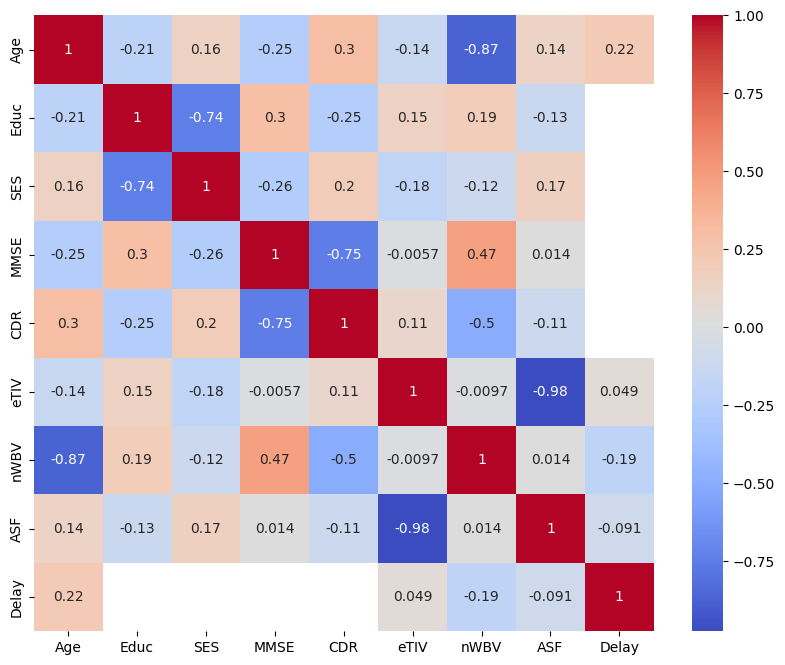

Summary Statistics:
              Age        Educ         SES       MMSE         CDR         eTIV  \
count  436.000000  235.000000  216.000000  235.00000  235.000000   436.000000   
mean    51.357798    3.178723    2.490741   27.06383    0.285106  1481.919725   
std     25.269862    1.311510    1.120593    3.69687    0.383405   158.740866   
min     18.000000    1.000000    1.000000   14.00000    0.000000  1123.000000   
25%     23.000000    2.000000    2.000000   26.00000    0.000000  1367.750000   
50%     54.000000    3.000000    2.000000   29.00000    0.000000  1475.500000   
75%     74.000000    4.000000    3.000000   30.00000    0.500000  1579.250000   
max     96.000000    5.000000    5.000000   30.00000    2.000000  1992.000000   

             nWBV         ASF     Delay  
count  436.000000  436.000000  20.00000  
mean     0.791670    1.198894  20.55000  
std      0.059937    0.128682  23.86249  
min      0.644000    0.881000   1.00000  
25%      0.742750    1.111750   2.75000 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(filepath):
    # Load the dataset into a pandas DataFrame
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return

    # Display the first few rows of the dataset
    print("Preview of the dataset:")
    print(df.head())

    # Get basic information about the dataset
    print("\nDataset Information:")
    print(df.info())

    # Summary statistics of numerical columns
    print("\nSummary Statistics:")
    print(df.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Visualize the distribution of numerical features using histograms
    print("\nHistograms:")
    df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()

    # Visualize the correlation between numerical features using a heatmap
    print("\nCorrelation Heatmap:")
    numerical_features = df.select_dtypes(include=[int, float]).columns
    correlation_matrix = df[numerical_features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.show()

    summary_stats = df.describe()

    print("Summary Statistics:")
    print(summary_stats)

if __name__ == "__main__":
    # Replace 'UberDataset.csv' with the actual file name and path
    file_path = r'E:/OneDrive/Desktop/SEM1/Programming for Big Data/Assignment/Python Assignment 10/oasis_cross-sectional.csv'
    perform_eda(file_path)

In [23]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
file_path = "E:/OneDrive/Desktop/SEM1/Programming for Big Data/Assignment/Python Assignment 10/oasis_cross-sectional.csv"
df = pd.read_csv(file_path)

# Step 2: Handling missing values
# For this example, we'll fill the missing values in 'Age' with the mean.
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Step 3: Encoding categorical variables
# Convert 'Gender' column into numerical values using one-hot encoding.
df = pd.get_dummies(df, columns=['M/F'], drop_first=True)


# Step 4: Drop unnecessary columns
# If certain columns are not needed, you can drop them.
df.drop(['ID', 'Hand'], axis=1, inplace=True)

# Display the preprocessed dataset
print("Preprocessed Dataset:")
print(df.head())


Preprocessed Dataset:
   Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  Delay  M/F_M
0   74   2.0  3.0  29.0  0.0  1344  0.743  1.306    NaN  False
1   55   4.0  1.0  29.0  0.0  1147  0.810  1.531    NaN  False
2   73   4.0  3.0  27.0  0.5  1454  0.708  1.207    NaN  False
3   28   NaN  NaN   NaN  NaN  1588  0.803  1.105    NaN   True
4   18   NaN  NaN   NaN  NaN  1737  0.848  1.010    NaN   True


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load the dataset
file_path = "E:/OneDrive/Desktop/SEM1/Programming for Big Data/Assignment/Python Assignment 10/oasis_cross-sectional.csv"
df = pd.read_csv(file_path)

# Step 2: Handling missing values and outliers
# For this example, we'll fill the missing values in 'Age' with the mean.
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Step 3:
# Drop columns that are not needed for modeling.
# Update the list of columns to drop based on the columns in the "oasis_cross-sectional.csv" dataset.
columns_to_drop = ['ID', 'Hand']
df.drop(columns_to_drop, axis=1, inplace=True)

# Step 4: Data Transformation
# Use ColumnTransformer to apply different preprocessing to different columns.
# For this example, we'll use one-hot encoding for categorical variables and StandardScaler for numerical features.
# Update the list of numerical and categorical features based on the columns in the "oasis_cross-sectional.csv" dataset.
numerical_features = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Delay']
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['M/F']  # Add other categorical features if needed
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing to the dataframe
df_transformed = preprocessor.fit_transform(df)
print("Preprocessed Dataset:")
print(df_transformed[:5])


Preprocessed Dataset:
[[ 0.89704535 -0.90067133  0.45551095  0.52485018 -0.74520384 -0.86983375
  -0.81294769  0.83328123         nan  1.          0.        ]
 [ 0.14429781  0.62754356 -1.33340478  0.52485018 -0.74520384 -2.11227567
   0.30617709  2.58378209         nan  1.          0.        ]
 [ 0.85742706  0.62754356  0.45551095 -0.01730275  0.56168349 -0.17608445
  -1.39756511  0.06306086         nan  1.          0.        ]
 [-0.92539605         nan         nan         nan         nan  0.66902833
   0.18925361 -0.73049953         nan  0.          1.        ]
 [-1.32157897         nan         nan         nan         nan  1.60874329
   0.94090458 -1.4695999          nan  0.          1.        ]]


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load the dataset
file_path = 'E:/OneDrive/Desktop/SEM1/Programming for Big Data/Assignment/Python Assignment 10/oasis_cross-sectional.csv'
df = pd.read_csv(file_path)

# Step 2: Preprocessing 
numerical_features = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Delay']
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['M/F']  # Add other categorical features if needed
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Check if the 'Title' column exists before dropping it
if 'Delay' in df.columns:
    df.drop('Delay', axis=1, inplace=True)

# Step 3: Split the data into training and testing sets
X = df.drop('M/F', axis=1)  # Update 'Survived' to the appropriate target column name
y = df['M/F']  # Update 'Survived' to the appropriate target column name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling (not required for all models, but we'll use it for SVM)
# Drop non-numeric columns before scaling
X_train_numeric = X_train.select_dtypes(include=[int, float])
X_test_numeric = X_test.select_dtypes(include=[int, float])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 5: Implement the models
# Model 1: Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, y_train)  # Use X_train_imputed instead of X_train_numeric

# Step 6: Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Precision, Recall, and F1-score for each class
    precision_micro = precision_score(y_test, y_pred, average='micro')
    recall_micro = recall_score(y_test, y_pred, average='micro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    return accuracy, precision_micro, recall_micro, f1_micro

svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm_model, X_test_scaled, y_test)
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test_imputed, y_test)


# Step 7: Compare the performance
print("Support Vector Machine (SVM) Performance:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1 Score: {svm_f1:.2f}")

print("\nRandom Forest Performance:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")


Support Vector Machine (SVM) Performance:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1 Score: 0.73

Random Forest Performance:
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1 Score: 0.76


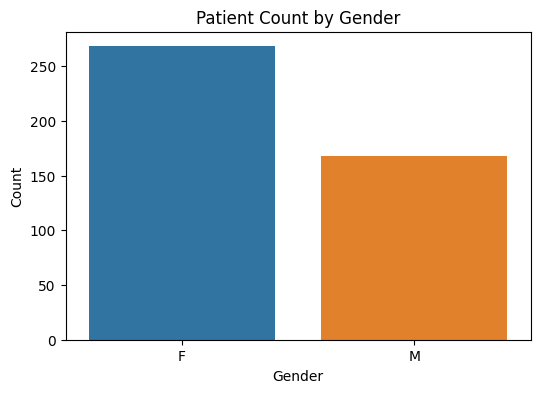

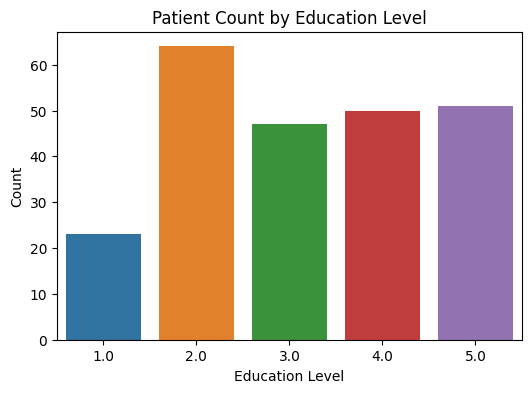

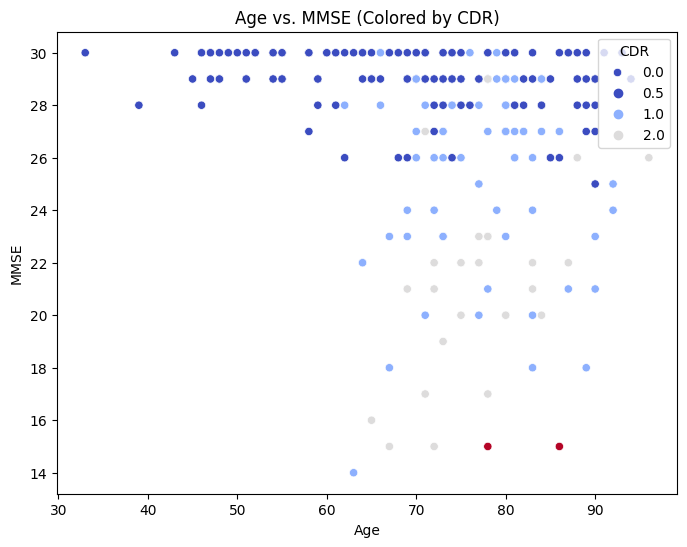

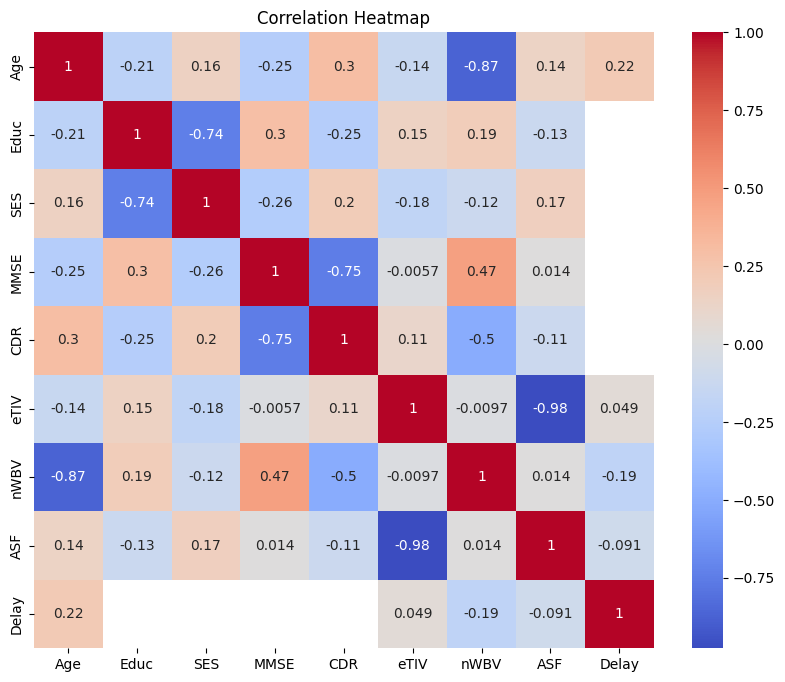

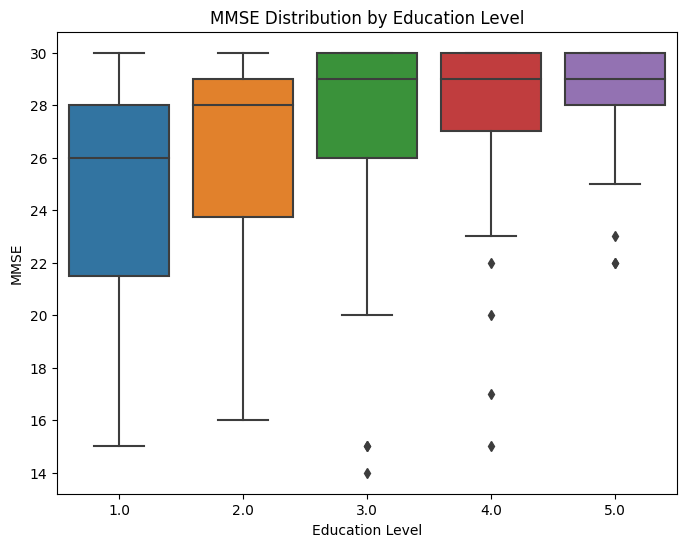

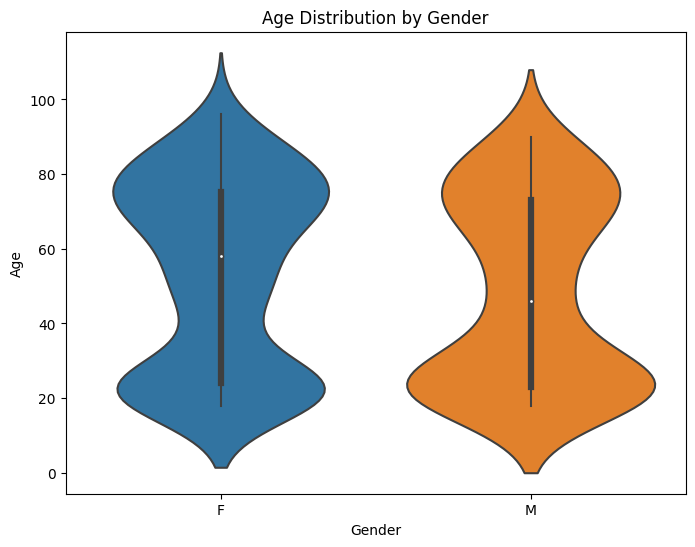

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio


# Step 1: Load the dataset
file_path = 'E:/OneDrive/Desktop/SEM1/Programming for Big Data/Assignment/Python Assignment 10/oasis_cross-sectional.csv'
df = pd.read_csv(file_path)

# Step 2: Data Exploration and Visualization

# 1. Bar chart to visualize the distribution of patients by 'M/F'
plt.figure(figsize=(6, 4))
sns.countplot(x='M/F', data=df)
plt.title("Patient Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 2. Bar chart to visualize the distribution of patients by 'Educ'
plt.figure(figsize=(6, 4))
sns.countplot(x='Educ', data=df)
plt.title("Patient Count by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

# 3. Scatter plot to visualize the relationship between 'Age' and 'MMSE' colored by 'CDR'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='MMSE', data=df, hue='CDR', palette='coolwarm')
plt.title("Age vs. MMSE (Colored by CDR)")
plt.xlabel("Age")
plt.ylabel("MMSE")
plt.legend(title="CDR", loc='upper right', labels=['0.0', '0.5', '1.0', '2.0'])
plt.show()

# Step 3: Remove non-numeric columns before calculating the correlation matrix
numerical_features = df.select_dtypes(include=[int, float])
correlation_matrix = numerical_features.corr()

# 4. Correlation heatmap to visualize the relationships between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 5. Box plot to visualize the distribution of MMSE scores by education level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Educ', y='MMSE', data=df)
plt.title("MMSE Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("MMSE")
plt.show()

# 6. Violin plot to visualize the distribution of ages by gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='M/F', y='Age', data=df)
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()


